In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Pathologys<h2>

In [89]:
pathologys = pd.read_csv("Test/Test_100ws.csv")
pathologys = pathologys[["hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
pathologys_id = np.repeat(1,869)

pathologys["cond_id"] = pathologys_id
pathologyst = pathologys.dropna(inplace=True)
pathologys

,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,se_spectral_entropy,...,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy,cond_id
0,0.024570,0.002149,0.687467,0.012579,-0.084067,5.345920,0.765058,0.057268,0.466584,4.639612,...,6.338076,0.242591,0.005455,1.371776,5.880067,0.528088,0.004535,1.106997,5.868318,1
1,0.141659,0.005319,0.732894,0.006321,-0.048997,3.832142,1.169088,0.189573,0.727071,2.710175,...,3.742067,0.638226,0.025388,-0.394238,3.896979,0.974385,0.018543,-0.471791,2.881037,1
2,0.146632,0.005525,0.532273,0.008014,-0.177844,6.256509,0.519728,0.025218,0.970259,5.721700,...,7.253260,0.337414,0.006420,-0.145732,7.065381,0.570196,0.004322,-0.926832,5.773350,1
3,0.178649,0.013374,0.470510,0.015445,0.056521,5.060402,0.419690,0.033557,1.087329,5.095249,...,6.114702,0.295277,0.009053,0.549816,5.959068,0.542149,0.013972,-1.470746,4.268255,1
4,0.109470,0.000517,0.899458,0.001107,-0.185131,2.508365,1.489345,0.014806,0.056928,2.555133,...,2.582066,0.257103,0.001379,-0.181628,2.474683,0.584477,0.002562,0.069249,2.383423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.060438,0.004224,0.541597,0.008792,-0.738587,7.990240,0.595218,0.022304,-0.433493,7.667541,...,9.553123,0.250585,0.008464,0.699231,8.194354,0.533467,0.012949,-0.613358,6.321847,1
865,0.018969,0.000128,0.562526,0.001480,0.994590,1.936754,0.607687,0.009199,0.401184,2.159141,...,2.276681,0.218257,0.000666,-0.649942,2.283495,0.411249,0.002322,0.063398,1.868363,1
866,0.039355,0.001994,0.407277,0.018199,0.612575,3.296518,0.429414,0.020299,0.330811,4.605100,...,6.742022,0.275050,0.006244,1.353649,8.305012,0.548328,0.009191,1.252023,7.115143,1
867,0.057872,0.004703,0.416109,0.020682,0.395070,3.713808,0.434553,0.028139,0.271990,4.501753,...,7.460137,0.243179,0.004911,0.104312,7.744961,0.489102,0.015933,-0.172911,5.237698,1


<h2>Healthy<h2>

In [90]:
healthy = pd.read_csv("Test/healthy.csv",index_col=0)
healthy = healthy[["cond_id","hst_mean","hst_variance","ae_mean","ae_variance","ae_skewness","ae_spectral_entropy","se_mean","se_variance","se_skewness","se_spectral_entropy","hfd_mean","hfd_variance","hfd_skewness","hfd_spectral_entropy","dfa_mean","dfa_variance","dfa_skewness","dfa_spectral_entropy","psd_mean","psd_variance","psd_skewness","psd_spectral_entropy"]]
healthy_id = np.repeat(0,71)

healthy["cond_id"] = healthy_id
healthy.dropna(inplace=True)
healthy

,cond_id,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0,0.363059,0.008075,0.869854,0.026340,-0.417527,7.677662,1.258177,0.279852,0.179231,...,0.318946,6.349423,1.056166,0.058372,-0.021906,7.329828,2.948702,2.123083,1.669187,7.606143
1,0,0.376262,0.006391,0.809583,0.020615,-0.436781,7.606441,1.101615,0.235723,0.546154,...,0.236032,7.271541,1.207732,0.095106,-0.419016,7.726222,3.668699,4.906767,0.912975,7.627236
2,0,0.364838,0.009951,0.896732,0.026714,-0.445707,7.497224,1.492373,0.287671,0.147542,...,-0.352436,6.698831,0.970993,0.061560,0.133208,6.877575,2.304022,1.119160,1.627376,7.104457
3,0,0.345752,0.007901,0.893707,0.028213,-0.690823,7.682360,1.379022,0.271065,0.396579,...,0.234404,5.503760,1.170885,0.056314,-0.627747,6.576970,3.759962,3.354405,1.169056,7.079545
4,0,0.391865,0.010604,0.854226,0.028353,-0.378165,7.429866,1.135178,0.203129,0.299207,...,-0.162974,5.131133,0.991371,0.077937,-0.084601,6.644150,2.545815,2.257757,2.540183,7.646542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,0.331764,0.006503,0.895582,0.017901,-0.618706,5.636460,1.272453,0.223608,0.525431,...,1.091456,4.769931,1.263120,0.037846,-1.397702,4.877176,4.154886,1.954736,1.180779,5.864923
67,0,0.292186,0.003816,0.920235,0.011360,-0.162415,6.077887,1.280746,0.155168,0.736619,...,0.228502,5.452749,1.235009,0.014202,-0.164231,5.866244,3.742846,0.493204,1.077111,5.990598
68,0,0.319870,0.003143,0.970820,0.017264,-0.686368,6.156190,1.429316,0.164720,1.028328,...,0.115921,5.085080,1.245289,0.017277,0.300543,5.363782,3.733799,0.998427,1.038378,5.766164
69,0,0.287464,0.002676,0.944685,0.007438,-0.605259,5.046040,1.221847,0.076840,0.118675,...,0.847035,4.008908,1.337280,0.014976,-0.803603,4.805654,4.487969,1.308256,0.622610,5.011854


<h2>Scatter plots<h2>

Text(0, 0.5, 'DFA')

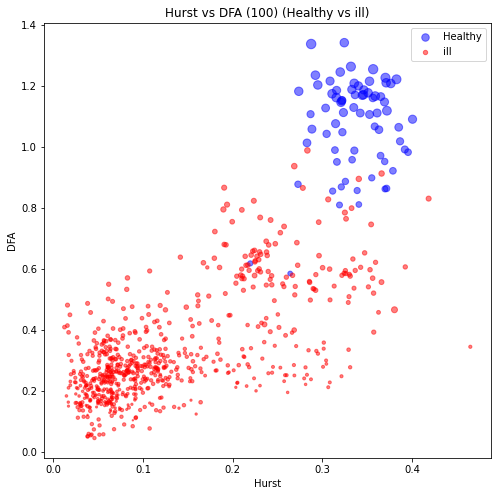

In [85]:
np_pop = np.array(healthy["psd_mean"])*20
np_pop1 = np.array(pathologys["psd_mean"])*20

fig = plt.figure(figsize=(8,8))

a=plt.scatter(healthy['hst_mean'],healthy["dfa_mean"],color="blue",alpha=0.5,s=np_pop)
b=plt.scatter(pathologys['hst_mean'],pathologys["dfa_mean"],color="red",alpha=0.5,s=np_pop1)
plt.title("Hurst vs DFA (100) (Healthy vs ill)")
plt.legend((a,b),("Healthy","ill"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("DFA")

Text(0, 0.5, 'DFA')

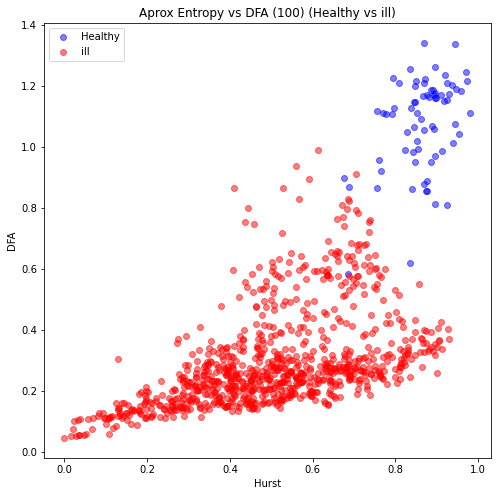

In [34]:
fig = plt.figure(figsize=(8,8))

a=plt.scatter(healthy['ae_mean'],healthy["dfa_mean"],color="blue",alpha=0.5)
b=plt.scatter(pathologys['ae_mean'],pathologys["dfa_mean"],color="red",alpha=0.5)
plt.title("Aprox Entropy vs DFA (100) (Healthy vs ill)")
plt.legend((a,b),("Healthy","ill"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("DFA")

Text(0, 0.5, 'DFA')

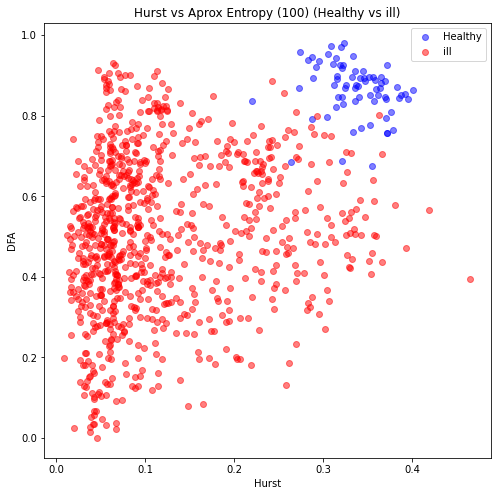

In [35]:
fig = plt.figure(figsize=(8,8))

a=plt.scatter(healthy['hst_mean'],healthy["ae_mean"],color="blue",alpha=0.5)
b=plt.scatter(pathologys['hst_mean'],pathologys["ae_mean"],color="red",alpha=0.5)
plt.title("Hurst vs Aprox Entropy (100) (Healthy vs ill)")
plt.legend((a,b),("Healthy","ill"))
plt.axis
plt.xlabel("Hurst")
plt.ylabel("DFA")

<h2>Define train set and targets<h2>

In [91]:
targets = healthy['cond_id'].tolist() + pathologys['cond_id'].tolist()
healthy_train = healthy.iloc[:,1:24]
pathologys_train = pathologys.iloc[:,0:22]
X=pd.concat([healthy_train,pathologys_train],ignore_index=True)
X

,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,se_spectral_entropy,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0.363059,0.008075,0.869854,0.026340,-0.417527,7.677662,1.258177,0.279852,0.179231,7.647412,...,0.318946,6.349423,1.056166,0.058372,-0.021906,7.329828,2.948702,2.123083,1.669187,7.606143
1,0.376262,0.006391,0.809583,0.020615,-0.436781,7.606441,1.101615,0.235723,0.546154,7.926565,...,0.236032,7.271541,1.207732,0.095106,-0.419016,7.726222,3.668699,4.906767,0.912975,7.627236
2,0.364838,0.009951,0.896732,0.026714,-0.445707,7.497224,1.492373,0.287671,0.147542,7.458491,...,-0.352436,6.698831,0.970993,0.061560,0.133208,6.877575,2.304022,1.119160,1.627376,7.104457
3,0.345752,0.007901,0.893707,0.028213,-0.690823,7.682360,1.379022,0.271065,0.396579,7.201969,...,0.234404,5.503760,1.170885,0.056314,-0.627747,6.576970,3.759962,3.354405,1.169056,7.079545
4,0.391865,0.010604,0.854226,0.028353,-0.378165,7.429866,1.135178,0.203129,0.299207,7.683065,...,-0.162974,5.131133,0.991371,0.077937,-0.084601,6.644150,2.545815,2.257757,2.540183,7.646542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.060438,0.004224,0.541597,0.008792,-0.738587,7.990240,0.595218,0.022304,-0.433493,7.667541,...,0.962385,9.553123,0.250585,0.008464,0.699231,8.194354,0.533467,0.012949,-0.613358,6.321847
724,0.018969,0.000128,0.562526,0.001480,0.994590,1.936754,0.607687,0.009199,0.401184,2.159141,...,-0.043537,2.276681,0.218257,0.000666,-0.649942,2.283495,0.411249,0.002322,0.063398,1.868363
725,0.039355,0.001994,0.407277,0.018199,0.612575,3.296518,0.429414,0.020299,0.330811,4.605100,...,2.195665,6.742022,0.275050,0.006244,1.353649,8.305012,0.548328,0.009191,1.252023,7.115143
726,0.057872,0.004703,0.416109,0.020682,0.395070,3.713808,0.434553,0.028139,0.271990,4.501753,...,1.821796,7.460137,0.243179,0.004911,0.104312,7.744961,0.489102,0.015933,-0.172911,5.237698


<h2>Split train data sets <h2>

In [92]:
#Split data to test and train groups
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))
X.dropna()
X

582
582


,hst_mean,hst_variance,ae_mean,ae_variance,ae_skewness,ae_spectral_entropy,se_mean,se_variance,se_skewness,se_spectral_entropy,...,hfd_skewness,hfd_spectral_entropy,dfa_mean,dfa_variance,dfa_skewness,dfa_spectral_entropy,psd_mean,psd_variance,psd_skewness,psd_spectral_entropy
0,0.363059,0.008075,0.869854,0.026340,-0.417527,7.677662,1.258177,0.279852,0.179231,7.647412,...,0.318946,6.349423,1.056166,0.058372,-0.021906,7.329828,2.948702,2.123083,1.669187,7.606143
1,0.376262,0.006391,0.809583,0.020615,-0.436781,7.606441,1.101615,0.235723,0.546154,7.926565,...,0.236032,7.271541,1.207732,0.095106,-0.419016,7.726222,3.668699,4.906767,0.912975,7.627236
2,0.364838,0.009951,0.896732,0.026714,-0.445707,7.497224,1.492373,0.287671,0.147542,7.458491,...,-0.352436,6.698831,0.970993,0.061560,0.133208,6.877575,2.304022,1.119160,1.627376,7.104457
3,0.345752,0.007901,0.893707,0.028213,-0.690823,7.682360,1.379022,0.271065,0.396579,7.201969,...,0.234404,5.503760,1.170885,0.056314,-0.627747,6.576970,3.759962,3.354405,1.169056,7.079545
4,0.391865,0.010604,0.854226,0.028353,-0.378165,7.429866,1.135178,0.203129,0.299207,7.683065,...,-0.162974,5.131133,0.991371,0.077937,-0.084601,6.644150,2.545815,2.257757,2.540183,7.646542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,0.060438,0.004224,0.541597,0.008792,-0.738587,7.990240,0.595218,0.022304,-0.433493,7.667541,...,0.962385,9.553123,0.250585,0.008464,0.699231,8.194354,0.533467,0.012949,-0.613358,6.321847
724,0.018969,0.000128,0.562526,0.001480,0.994590,1.936754,0.607687,0.009199,0.401184,2.159141,...,-0.043537,2.276681,0.218257,0.000666,-0.649942,2.283495,0.411249,0.002322,0.063398,1.868363
725,0.039355,0.001994,0.407277,0.018199,0.612575,3.296518,0.429414,0.020299,0.330811,4.605100,...,2.195665,6.742022,0.275050,0.006244,1.353649,8.305012,0.548328,0.009191,1.252023,7.115143
726,0.057872,0.004703,0.416109,0.020682,0.395070,3.713808,0.434553,0.028139,0.271990,4.501753,...,1.821796,7.460137,0.243179,0.004911,0.104312,7.744961,0.489102,0.015933,-0.172911,5.237698


<h2>Logistic Regression<h2>

Accuracy:  0.9863013698630136


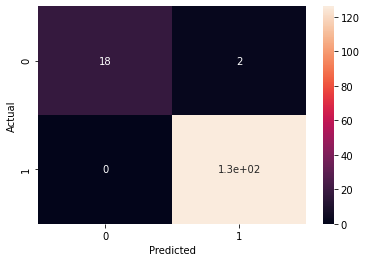

In [93]:
from sklearn.preprocessing import StandardScaler

#Logistic Regression function
logistic_regression= LogisticRegression(max_iter=20000)
sc = StandardScaler()

#Training
X_train = sc.fit_transform(X_train)
logistic_regression.fit(X_train,y_train)
X_test = sc.fit_transform(X_test)

#Testing
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

#Confussion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

<h2>Random forest<h2>

Accuracy :  0.9931506849315068


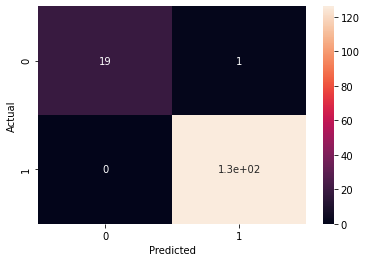

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


classifier = RandomForestClassifier()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

classifier.fit(X_train, y_train)

X_test = sc.fit_transform(X_test)
y_pred = classifier.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

confusion_matrix = pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
